(50, 192, 192)


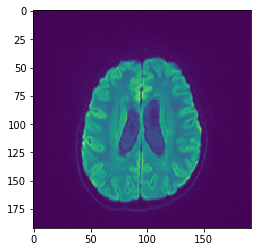

(192, 256, 252)


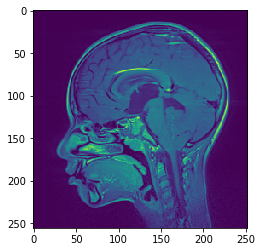

(192, 256, 252)


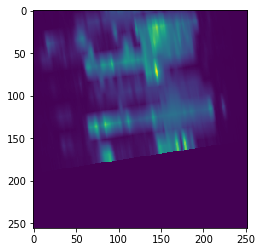

--------------------------------------
(192, 256, 252)


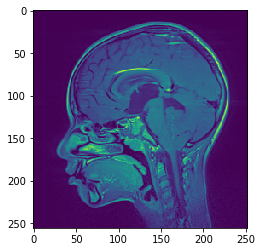

(40, 384, 300)


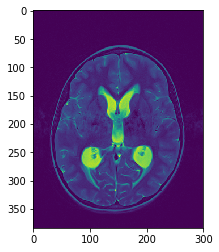

(40, 384, 300)


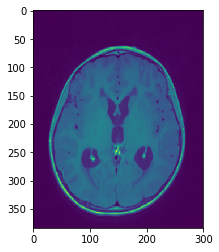

--------------------------------------
(40, 384, 300)


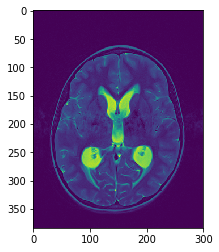

(35, 384, 348)


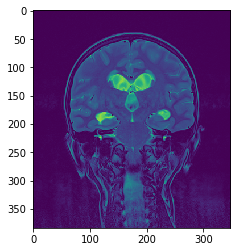

(35, 384, 348)


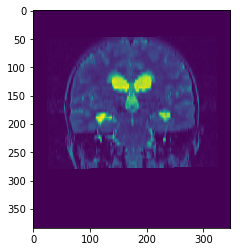

--------------------------------------
(35, 384, 348)


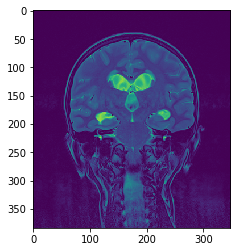

(22, 320, 320)


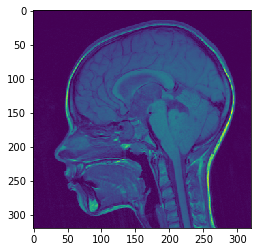

(22, 320, 320)


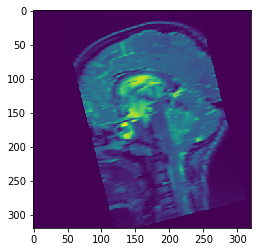

--------------------------------------
(22, 320, 320)


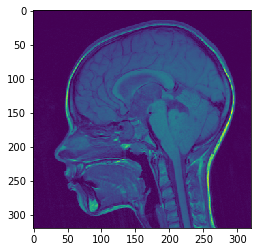

(25, 192, 192)


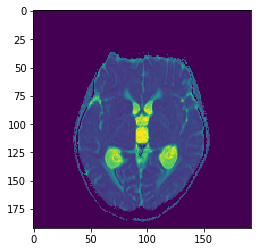

(25, 192, 192)


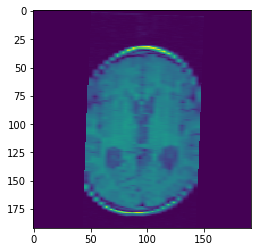

--------------------------------------
(25, 192, 192)


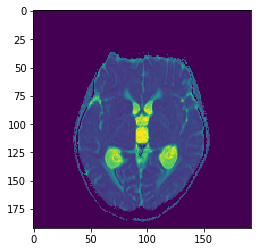

(40, 320, 310)


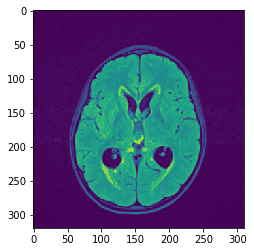

(40, 320, 310)


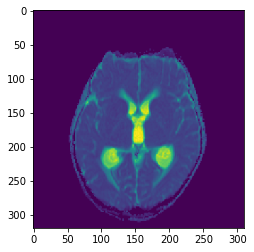

--------------------------------------
(40, 320, 310)


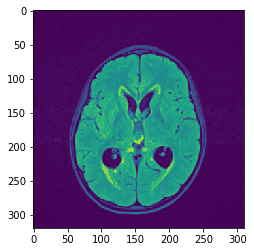

(35, 512, 432)


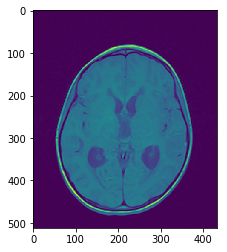

(35, 512, 432)


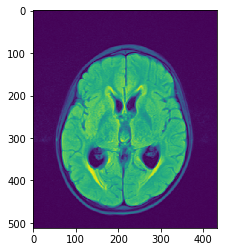

--------------------------------------
(35, 512, 432)


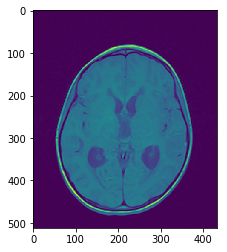

(35, 512, 432)


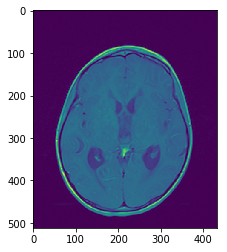

(35, 512, 432)


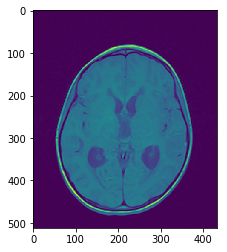

--------------------------------------


In [45]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import SimpleITK as sitk
import os
import pydicom

%matplotlib inline
        
class CoRegistration():
    
    def __init__(self, first_dir, second_dir):
        self.first_dir = first_dir
        self.second_dir = second_dir
        
    def get_meta_data(self):
        # Reading meta data of the first images
        reader_first = sitk.ImageSeriesReader()
        reader_first.SetOutputPixelType(sitk.sitkFloat32)
        dicom_first = reader_first.GetGDCMSeriesFileNames(self.first_dir)
        reader_first.SetFileNames(dicom_first)
        # Reading meta data of the second images
        reader_second = sitk.ImageSeriesReader()
        reader_second.SetOutputPixelType(sitk.sitkFloat32)
        dicom_second = reader_second.GetGDCMSeriesFileNames(self.second_dir)
        reader_second.SetFileNames(dicom_second)
        return (reader_first, reader_second)
                                                           
    def execute(self, reader_first, reader_second):
        return (reader_first.Execute(),
               reader_second.Execute())
    
    def resample(self, moving_image, fixed_image):
        return sitk.Resample(moving_image, fixed_image)
    
    def images_to_np_array(self, moving_image, fixed_image, resampled_image):
        return (sitk.GetArrayFromImage(moving_image),
               sitk.GetArrayFromImage(fixed_image),
               sitk.GetArrayFromImage(resampled_image))
    
    def plot_images(self, moving_image_np, fixed_image_np, resampled_image_np):
        print(str(moving_image_np.shape))
        depth_level, _, _ = moving_image_np.shape
        plt.imshow(moving_image_np[int(depth_level/2),:,:])
        plt.show()
        print(str(fixed_image_np.shape))
        depth_level, _, _ = fixed_image_np.shape
        plt.imshow(fixed_image_np[int(depth_level/2),:,:])
        plt.show()
        print(str(resampled_image_np.shape))
        depth_level, _, _ = resampled_image_np.shape
        plt.imshow(resampled_image_np[int(depth_level/2),:,:])
        plt.show()    
        print("--------------------------------------")
        
    def convert_resampled_np_to_nifti(self, resampled_image_np):
        return nib.Nifti1Image(resampled_image_np, affine=np.eye(4))

    def start_coregistration(self):
        reader_first, reader_second = self.get_meta_data()
        moving_image, fixed_image = self.execute(reader_first, reader_second)
        resampled_image = self.resample(moving_image, fixed_image)
        moving_image_np, fixed_image_np, resampled_image_np = self.images_to_np_array(moving_image,
                                                                                fixed_image,
                                                                                resampled_image)
        self.plot_images(moving_image_np, fixed_image_np, resampled_image_np)
        self.convert_resampled_np_to_nifti(resampled_image_np)
                          
for i in range (0, 8):
    FIRST_IMAGE_DIR = f"/Users/riccardobusetti/Desktop/tmp_processed/pa001/st000/se00{i}"
    SECOND_IMAGE_DIR = f"/Users/riccardobusetti/Desktop/tmp_processed/pa001/st000/se00{i+1}"
    coregistration = CoRegistration(FIRST_IMAGE_DIR, SECOND_IMAGE_DIR)  
    coregistration.start_coregistration()